In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
print('tensorflow {}'.format(tf.__version__))
print("keras {}".format(keras.__version__))

tensorflow 2.9.2
keras 2.9.0


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def background_delete_save_ver2(_img,cnt):
  dir = cnt//1000
  img = cv.imread(_img)
  height, width, channel = img.shape
  rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)/255.0
  h,s,v = cv.split(hsv)
  metric = (h>h[0][0]+0.015) | (h<h[0][0]-0.015) | (s>s[0][0]+0.045) | (s<s[0][0]-0.045)
  metric = metric.reshape(height,width,1)
  new_img = img*metric
  cv.imwrite('/content/drive/MyDrive/all_pills/ver2/{}.jpg'.format(cnt), new_img)


In [ ]:
cnt = 0
for i in range(0,18776):
  background_delete_save_ver2('/content/drive/MyDrive/all_pills/{}.jpg'.format(i),cnt)
  cnt += 1
  if i%187==186:
    print(i,'Done \n')
  

In [ ]:
'-------------------------------------------------------------------------------------------------------------------------------'

'-------------------------------------------------------------------------------------------------------------------------------'

In [ ]:
not_done=[1017,1095,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1976,1977]

In [ ]:
for nd in not_done:
  dir = nd//1000
  img = cv.imread('/content/drive/MyDrive/all_pills/{}.jpg'.format(nd))
  height, width, channel = img.shape
  rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)/255.0
  h,s,v = cv.split(hsv)
  metric = (h>h[-1][-1]+0.015) | (h<h[-1][-1]-0.015) | (s>s[-1][-1]+0.045) | (s<s[-1][-1]-0.045)
  metric = metric.reshape(height,width,1)
  new_img = Image.fromarray(img*metric)
  new_img.save('/content/drive/MyDrive/all_pills_bgd/{}000-{}999/{}.jpg'.format(dir,dir,nd))

In [ ]:
img = cv.imread('/content/drive/MyDrive/all_pills/0.jpg')
height, width, channel = img.shape
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)/255.0
h,s,v = cv.split(hsv)
metric = (h>h[0][0]+0.015) | (h<h[0][0]-0.015) | (s>s[0][0]+0.045) | (s<s[0][0]-0.045)
metric = metric.reshape(height,width,1)
new_img = rgb*metric


In [ ]:
img.shape, metric.shape, new_img.shape

((709, 1299, 3), (709, 1299, 1), (709, 1299, 3))

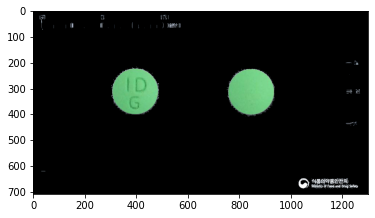

In [ ]:
plt.imshow(new_img)
plt.show()

In [ ]:

im = Image.open(_img)
img = np.array(im)
height, width, channel = img.shape
bgr = img.astype(np.float)/255.0
b, g, r = cv.split(bgr)
h = np.zeros((height,width), dtype=np.float)
s = np.zeros((height,width),dtype=np.float)
v = np.max(bgr, axis=2)


metric = (h>h[0][0]+0.015) | (h<h[0][0]-0.015) | (s>s[0][0]+0.045) | (s<s[0][0]-0.045)
metric = metric.reshape(height,width,1)
new_img = Image.fromarray(img*metric)

In [ ]:
'----------------------------'

'----------------------------'

In [ ]:
def background_delete_save_ver3(_img,cnt):       # for masking
  dir = cnt//1000
  img = cv.imread(_img)
  img = cv.resize(img, (224,224), interpolation = cv.INTER_AREA)
  height, width, channel = img.shape
  rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  hsv = cv.cvtColor(rgb, cv.COLOR_RGB2HSV)/255.0
  h,s,v = cv.split(hsv)
  metric = (h>h[0][0]+0.015) | (h<h[0][0]-0.015) | (s>s[0][0]+0.045) | (s<s[0][0]-0.045)
  metric = metric.reshape(height,width,1)
  metric = metric.astype(int)
  #metric = (metric* -1) + 1
  return metric
  #new_img = np.concatenate((np.zeros((height,width,1)), np.zeros((height,width,1)), metric*255.0),axis=2)
  #cv.imwrite('/content/drive/MyDrive/test/{}.jpg'.format(cnt), new_img)

In [ ]:
cnt = 0 
l = list()
for i in range(0, 18776):
  try:
    l.append(background_delete_save_ver3('/content/drive/MyDrive/pills_preprocessing/cropped_pills/{}_f.jpg'.format(i),cnt))
  except:
    l.append(np.zeros((224,224,1)))
  cnt += 1
  if i%1800==1799:
    print(i+1,'Done \n')
  

1800 Done 

3600 Done 

5400 Done 

7200 Done 

9000 Done 

10800 Done 

12600 Done 

14400 Done 

16200 Done 

18000 Done 



In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/cropped_masking_all_1', "wb" ) as file:
    pickle.dump(ll[:10000], file)

In [ ]:
with open('/content/drive/MyDrive/cropped_masking_all_2', "wb" ) as file:
    pickle.dump(ll[10000:], file)